# Character Statistics
---

### Libraries

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

### Settings

In [78]:
pd.options.mode.copy_on_write = True

### .csv formatting

In [79]:
# Open csv
with open("data/pidas.csv", "r") as file: 
    reader = csv.reader(file) 
    
    with open("character-statistics.csv", "w") as result: 
        writer = csv.writer(result) 
        
        # Remove rows & columns
        i = 0
        for row in reader:
            if i != 0 and i != 1 and  i !=2:
                writer.writerow(row[1:])
   
            # Rename Alignment columns         
            if i == 1:
                row[5] = "Align_Law"
                row[6] = "Align_Moral"
                writer.writerow(row[1:])
            
            i += 1
        

In [80]:
# Make the dataframe
data = pd.read_csv("character-statistics.csv")
# Drop empty rows
data = data.dropna(subset=["Name"])
data.head()

,Name,Gender,Race,Size,Align_Law,Align_Moral,Age,Background,Relationships,Wellbeing,...,l3,Multiclass 3,l4,ASI 1,ASI 2,ASI 3,ASI 4,ASI 5,ASI 6,ASI 7
0,Yaevin,Male,Elf,Medium,Chaotic,Neutral,22.0,Criminal,Single,Alive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dexter,Male,Human,Medium,Chaotic,Good,25.0,Witchlight Hand,Single,Alive,...,NaN,NaN,NaN,Ability Score Improvement,Ability Score Improvement,Ability Score Improvement,Ability Score Improvement,NaN,NaN,NaN
2,Tchouf Mpaemn,Male,Gnome,Small,Neutral,Neutral,423.0,Haunted One,Widowed,Alive,...,NaN,NaN,NaN,Ability Score Improvement,Mounted Combatant,NaN,NaN,NaN,NaN,NaN
3,Achak Amai,Male,Human,Medium,Lawful,Good,35.0,Hermit,Single,Alive,...,NaN,NaN,NaN,Ability Score Improvement,NaN,NaN,NaN,NaN,NaN,NaN
4,Francine DeRaine,Female,Human,Medium,Chaotic,Good,26.0,Sailor,Single,Alive,...,NaN,NaN,NaN,Ability Score Improvement,Ability Score Improvement,NaN,NaN,NaN,NaN,NaN


### Data type transformation

In [81]:
# Gold to float 
data["Gold"] = data["Gold"].str.replace("g", "")
data["Gold"] = data["Gold"].str.replace(".", "")
data["Gold"] = data["Gold"].str.replace(",", ".")
data["Gold"] = pd.to_numeric(data["Gold"])

In [82]:
# Fill NaN values
data[["Gold", "l2", "l3", "l4"]] = data[["Gold", "l2", "l3", "l4"]].fillna(0.0)
data[["Multiclass 1", "Multiclass 2", "Multiclass 3"]] = data[["Multiclass 1", "Multiclass 2", "Multiclass 3"]].fillna("No")
data[["ASI 1", "ASI 2", "ASI 3", "ASI 4", "ASI 5", "ASI 6", "ASI 7"]] = data[["ASI 1", "ASI 2", "ASI 3", "ASI 4", "ASI 5", "ASI 6", "ASI 7"]].fillna("None")
data[["Level", "l1"]] = data[["Level", "l1"]].fillna(1.0)
data.head()

,Name,Gender,Race,Size,Align_Law,Align_Moral,Age,Background,Relationships,Wellbeing,...,l3,Multiclass 3,l4,ASI 1,ASI 2,ASI 3,ASI 4,ASI 5,ASI 6,ASI 7
0,Yaevin,Male,Elf,Medium,Chaotic,Neutral,22.0,Criminal,Single,Alive,...,0.0,No,0.0,None,None,None,None,None,None,None
1,Dexter,Male,Human,Medium,Chaotic,Good,25.0,Witchlight Hand,Single,Alive,...,0.0,No,0.0,Ability Score Improvement,Ability Score Improvement,Ability Score Improvement,Ability Score Improvement,None,None,None
2,Tchouf Mpaemn,Male,Gnome,Small,Neutral,Neutral,423.0,Haunted One,Widowed,Alive,...,0.0,No,0.0,Ability Score Improvement,Mounted Combatant,None,None,None,None,None
3,Achak Amai,Male,Human,Medium,Lawful,Good,35.0,Hermit,Single,Alive,...,0.0,No,0.0,Ability Score Improvement,None,None,None,None,None,None
4,Francine DeRaine,Female,Human,Medium,Chaotic,Good,26.0,Sailor,Single,Alive,...,0.0,No,0.0,Ability Score Improvement,Ability Score Improvement,None,None,None,None,None


# First Look
---

## Numeric Data

In [83]:
data[["Age", "Gold", "Level"]].describe()

,Age,Gold,Level
count,14.000000,14.000000,14.000000
mean,103.785714,11412.857143,8.071429
std,169.561960,39938.464480,3.604789
min,19.000000,0.000000,4.000000
25%,22.750000,10.000000,5.250000
50%,31.000000,175.000000,8.500000
75%,51.750000,450.000000,9.000000
max,562.000000,150000.000000,18.000000


## Categorical Data (Personal)

In [84]:
data[["Gender", "Race", "Size", "Align_Law", "Align_Moral", "Background", "Relationships", "Wellbeing", "Status"]].describe()

,Gender,Race,Size,Align_Law,Align_Moral,Background,Relationships,Wellbeing,Status
count,14,14,14,14,14,14,14,14,14
unique,3,10,2,3,2,13,2,1,3
top,Male,Human,Medium,Chaotic,Neutral,Hermit,Single,Alive,Active
freq,10,4,12,5,8,2,13,14,8


## Gender

Text(0.5, 1.0, 'Gender')

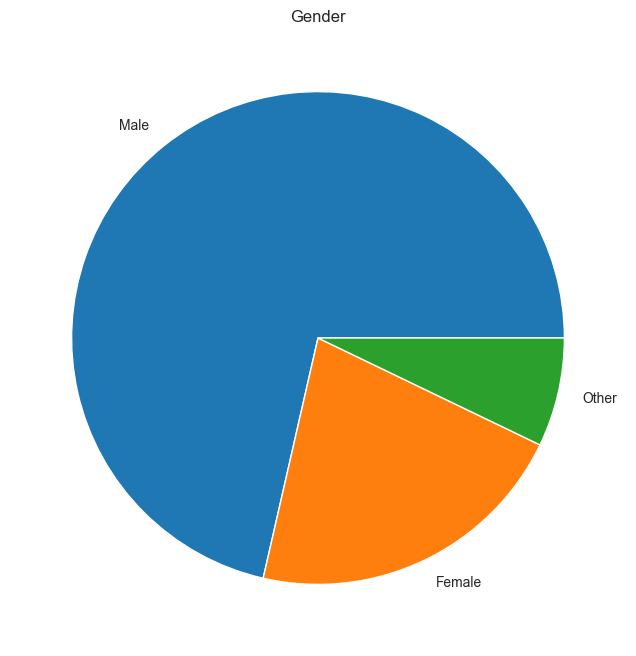

In [85]:
fig, ax = plt.subplots(figsize=(8, 8))

count = data.Gender.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index)
ax.set_title("Gender")

## Race & Size

Text(0.5, 1.0, 'Size')

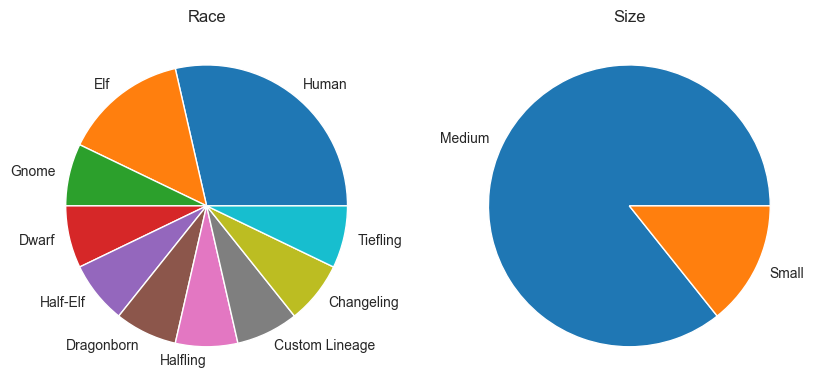

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

count = data.Race.value_counts(sort=True, normalize=True)
ax1.pie(count, labels=count.index)
ax1.set_title('Race')

count = data.Size.value_counts(sort=True, normalize=True)
ax2.pie(count, labels=count.index)
ax2.set_title('Size')